In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Making data frame from imported data
product_descriptions = pd.read_csv('/content/drive/MyDrive/ML DATA/nis1.csv')
product_descriptions.shape

(16897, 10)

In [ ]:
#making small set for experiment
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head(20)

,Product_Id,Product_title,Product_price,User_Id,Profile_name,Helpfullness,Ratings,Time_stamp,Summary,Review
0,B000179R3I,Amazon.com: Austin Reed Dartmouth Jacket In B...,unknown,A3Q0VJTUO4EZ56,"Jeanmarie Kabala ""JP Kabala""",7,4,1182816000,Periwinkle Dartmouth Blazer,I own the Austin Reed dartmouth blazer in eve...
1,B000GKXY34,"Nun Chuck, Novelty: Nun Toss Toy",17.99,ADX8VLDUOL7BG,M. Gingras,0,5,1262304000,Great fun!,Got these last Christmas as a gag gift. They ...
2,B000GKXY34,"Nun Chuck, Novelty Nun Toss Toy",17.99,A3NM6P6BIWTIAE,Maria Carpenter,0,3,1224633600,more like funchuck,Gave this to my dad for a gag gift after dire...
3,1882931173,Its Only Art If Its Well Hung!,unknown,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7,4,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a co...
4,B00002066I,ah,15.99,unknown,unknown,3,5,939772800,Inspiring,I hope a lot of people hear this cd. We need ...
5,B00002066I,ah,15.99,A2KLYVAS0MIBMQ,Stephen McClaning,0,5,1332288000,Great CD,My lovely Pat has one of the GREAT voices of ...
6,B000058A81,Chrono Cross,unknown,A18C9SNLZWVBIE,A reader,1,5,1096934400,First album I've bought since Napster,We've come a long way since the days of Ninet...
7,B000058A81,Chrono Cross,unknown,A38QSOKE2DD8JD,Christopher Walden,1,5,1088121600,"Pleasant to the ear, musical masterpiece",Final fantasy fans may be at first skeptical ...
8,B000058A81,Chrono Cross,unknown,AKZLIIH3AP4RU,IcemanJ,1,5,1075939200,Much more than a game Soundtrack.,This has got to be one of the best video game...
9,B000058A81,Chrono Cross,unknown,A1FELZOGR5DEOM,Shadow,1,5,1035417600,Amazing!,I used to find myself starting Chrono Cross o...


In [ ]:
#checking what do wee have as a data
product_descriptions1 = product_descriptions.head(20)
# product_descriptions1.iloc[:,1]

Data=product_descriptions1["Summary"].head(10)
Data

0                  Periwinkle Dartmouth Blazer
1                                   Great fun!
2                           more like funchuck
3       Nice collection of Julie Strain images
4                                    Inspiring
5                                     Great CD
6        First album I've bought since Napster
7     Pleasant to the ear, musical masterpiece
8            Much more than a game Soundtrack.
9                                     Amazing!
Name: Summary, dtype: object

In [ ]:
#imported library
import pandas as pd
import numpy as np

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster
 #Initializing stop word remover 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#initializing each process
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

#removing stop words e.g. is,this, that e.t.c. that we initialized earlier
stemmer = PorterStemmer()
sw = stopwords.words('english')

#now whatever data we have we are making each one of the single word as token (giving each of that words to seprate identity)

def tokenizer(N):
    return [stemmer.stem(w) for w in N.split()]

#for dealing with them we have to make them as a vector so represent each of them as vector - for that we are initializing that here 
tfidf = TfidfVectorizer(use_idf = False,norm=None)
tfidf.fit_transform(Data).toarray()

array([[0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.

In [ ]:
##for dealing with them we have to make them as a vector so represent each of them as vector - for that we implemented them here
pd.DataFrame(tfidf.fit_transform(Data).toarray(), index=Data, columns=tfidf.get_feature_names())

,album,amazing,blazer,bought,cd,collection,dartmouth,ear,first,fun,funchuck,game,great,images,inspiring,julie,like,masterpiece,more,much,musical,napster,nice,of,periwinkle,pleasant,since,soundtrack,strain,than,the,to,ve
Summary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Periwinkle Dartmouth Blazer,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Great fun!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
more like funchuck,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nice collection of Julie Strain images,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Inspiring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Great CD,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
First album I've bought since Napster,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
"Pleasant to the ear, musical masterpiece",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Much more than a game Soundtrack.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#we unitialized it earlier now implemented
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words=sw)
x=pd.DataFrame(tfidf.fit_transform(Data).toarray(), index=Data, columns=tfidf.get_feature_names())
x

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,album,amazing!,blazer,bought,cd,collect,dartmouth,"ear,",first,fun!,funchuck,game,great,i'v,imag,inspir,juli,like,masterpiec,much,music,napster,nice,periwinkl,pleasant,sinc,soundtrack.,strain
Summary,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Periwinkle Dartmouth Blazer,0.000000,0.0,0.57735,0.000000,0.000000,0.000000,0.57735,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.57735,0.0,0.000000,0.00000,0.000000
Great fun!,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.761905,0.000000,0.00000,0.647689,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000
more like funchuck,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.707107,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.707107,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000
Nice collection of Julie Strain images,0.000000,0.0,0.00000,0.000000,0.000000,0.447214,0.00000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.447214,0.0,0.447214,0.000000,0.0,0.00000,0.0,0.000000,0.447214,0.00000,0.0,0.000000,0.00000,0.447214
Inspiring,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000
Great CD,0.000000,0.0,0.00000,0.000000,0.761905,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.00000,0.647689,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000
First album I've bought since Napster,0.408248,0.0,0.00000,0.408248,0.000000,0.000000,0.00000,0.0,0.408248,0.000000,0.000000,0.00000,0.000000,0.408248,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.408248,0.000000,0.00000,0.0,0.408248,0.00000,0.000000
"Pleasant to the ear, musical masterpiece",0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.5,0.00000,0.5,0.000000,0.000000,0.00000,0.5,0.000000,0.00000,0.000000
Much more than a game Soundtrack.,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.57735,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.57735,0.000000


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
x1 = vectorizer.fit_transform(product_descriptions1["Summary"])
x1

<20x45 sparse matrix of type '<class 'numpy.float64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [ ]:
print(x1)

  (0, 3)	0.5773502691896257
  (0, 13)	0.5773502691896257
  (0, 35)	0.5773502691896257
  (1, 16)	0.7834702709266692
  (1, 20)	0.621429267555119
  (2, 17)	0.7071067811865475
  (2, 25)	0.7071067811865475
  (3, 22)	0.4472135954999579
  (3, 40)	0.4472135954999579
  (3, 24)	0.4472135954999579
  (3, 8)	0.4472135954999579
  (3, 30)	0.4472135954999579
  (4, 23)	1.0
  (5, 5)	0.6754797150119544
  (5, 20)	0.7373785693979511
  (6, 29)	0.5
  (6, 4)	0.5
  (6, 42)	0.5
  (6, 0)	0.5
  (7, 26)	0.5
  (7, 28)	0.5
  (7, 14)	0.5
  (7, 37)	0.5
  (8, 39)	0.7071067811865476
  (8, 18)	0.7071067811865476
  :	:
  (11, 1)	0.4525558140216501
  (12, 19)	0.600552628369745
  (12, 32)	0.5278949527286484
  (12, 41)	0.600552628369745
  (13, 11)	0.5795293456217987
  (13, 10)	0.6592938044426995
  (13, 5)	0.4790380120477301
  (14, 7)	0.5612610103900699
  (14, 27)	0.493357019105215
  (14, 18)	0.493357019105215
  (14, 20)	0.44517837056077963
  (15, 2)	0.7071067811865476
  (15, 39)	0.7071067811865476
  (16, 6)	0.600552628369745

In [ ]:
#Import important librarys for plotting
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame

# assign dataset that we have already decalared
X_train, _ = X1

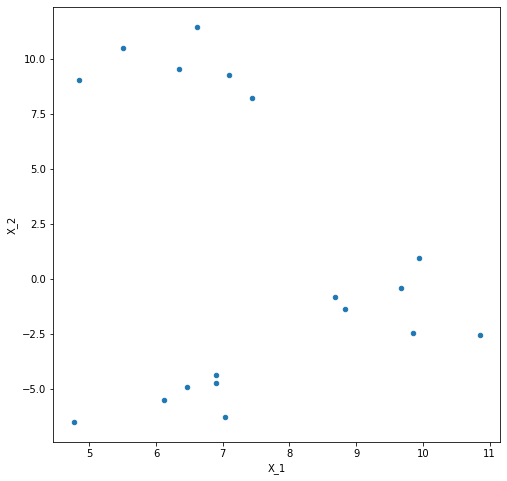

In [ ]:
#making data frame from that dataset 
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
#plotting that data set
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [ ]:
#helping function which initialize centeroids of cluster
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)

In [ ]:
#Helping function which will find distance between two function
def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

In [ ]:
#Helping function which assign clusters to that centeroids
def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

In [ ]:
#compute new centre based on cluster 
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

In [ ]:
#measure chnage between new and old clusters
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

In [ ]:
#plotting that computed cluster
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

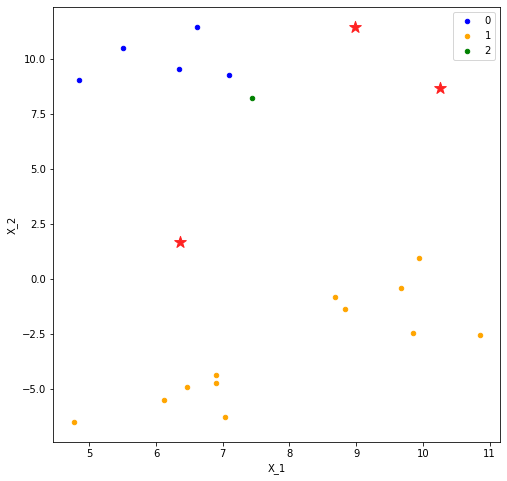

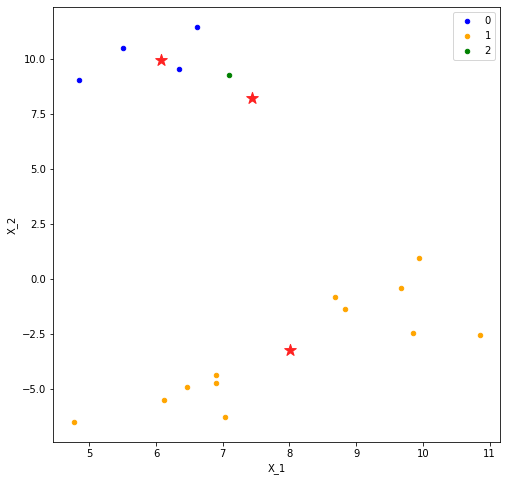

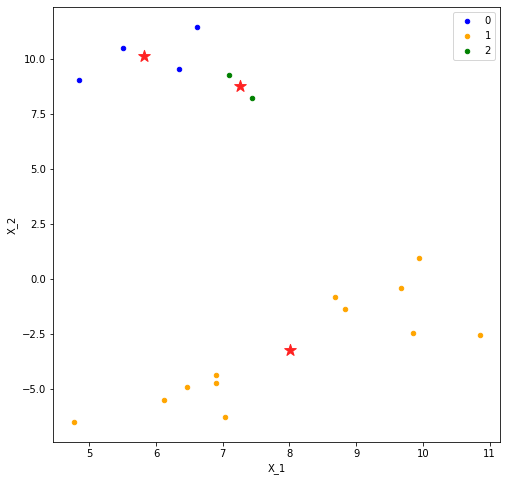

In [ ]:
#initializing k means function
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X) #initializing clusters
    cg_change = 100 #initializing initial change
    while cg_change>.001: #it will check disance between old centeroid and new centeroid
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

cluster = k_means(3, X_train)

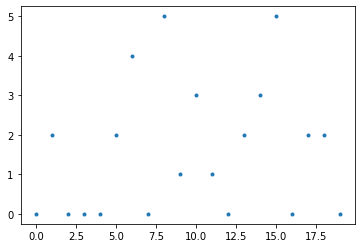

In [ ]:
# Fitting K-Means to the dataset
import matplotlib.pyplot as plt

X=X1
# K means using inbuild function 
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
#Made 5 cluster to see the out put that we got 
true_k = 5

#for checking what we got in that clusters
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 funchuck
 like
 compare
 nobou
 images
 strain
 julie
 collection
 nice
 cross
Cluster 1:
 soundtrack
 game
 best
 classic
 music
 great
 way
 damn
 funchuck
 fun
Cluster 2:
 amazing
 inspiring
 fun
 great
 rpg
 want
 blazer
 dartmouth
 periwinkle
 music
Cluster 3:
 cd
 cross
 great
 damn
 crono
 chrono
 hurray
 best
 bought
 ear
Cluster 4:
 non
 stuning
 gamer
 player
 excellent
 cd
 amazing
 cross
 game
 funchuck


In [ ]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])